In [43]:
#!pip3 install snscrape

In [44]:
# import pandas as pd
# import snscrape.modules.twitter as sntwitter
# import itertools

In [45]:
# #tampa 100 mile radius - ptsd

#run this in multiple iterations for each geocode and keyword combination

# loc = '27.9506, -82.4572, 160km'
# df_coord = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
#     'ptsd geocode:"{}"'.format(loc)).get_items(), 10000))[['date', 'content']]

# df_coord.head()




In [46]:
#store the results in a df


# from pathlib import Path  
# filepath = Path('C:/AR Files/FBARBP/Data/tampa_ptsd_100miles.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)  
# df_coord.to_csv(filepath) 

In [47]:
#fetch data city wise 

In [48]:
# df_city = pd.DataFrame(itertools.islice(sntwitter.TwitterSearchScraper(
#     'abuse near:"Miami,FL" within:175km').get_items(), 10000))[['url','date','content','username']]
    

In [49]:
# from pathlib import Path  
# filepath = Path('C:/AR Files/FBARBP/Data/miami_abuse_100miles_city.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)  
# df_city.to_csv(filepath)

In [42]:
#merge and clean all df's for final data prep

In [43]:
#Data Analysis
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import scipy
#import seaborn as sns
#import pandas_profiling
from collections import Counter
#import cv
import datetime
format="%Y-%m-%d"

#Feature Engineering & Models
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

#NLP
import string
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
stopwords = set(stopwords.words('english'))
stopwords.update(['I', "I'm",'im', 'st', 'r', 'guys','hey','hello', 'hi'])

import re
#from wordcloud import WordCloud, ImageColorGenerator
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Adhi
[nltk_data]     Rajan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Adhi
[nltk_data]     Rajan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Adhi
[nltk_data]     Rajan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [44]:
#!pip install pandas_profiling

In [45]:
#import pandas_profiling

In [46]:
#!pip install re 

In [47]:
import re


In [48]:
#!pip install wordcloud

In [50]:
#from wordcloud import WordCloud, ImageColorGenerator


In [51]:
#nltk.download('punkt')

In [52]:
reddit_df = pd.read_excel('C:/AR Files/FBARBP/Data/finalreddit.xlsx')

In [53]:
reddit_df = pd.DataFrame(reddit_df)
reddit_df = reddit_df[reddit_df['subreddit'].notna()]

In [54]:
reddit_df = reddit_df.drop_duplicates(subset=['post'])

In [55]:
reddit_df.head()

,subreddit,post
0,alcoholism,I need to quit while im young (22m) Im going t...
1,alcoholism,Its 1:30am. So glad to be sober. I was at a Ne...
2,alcoholism,Might quit tomorrow but don't want to hurt mys...
3,alcoholism,Treating alcoholism with naltrexone using Sinc...
4,alcoholism,"It took me being 6,000 in debt to realize I ne..."


In [56]:
Counter(reddit_df['subreddit'])

Counter({'alcoholism': 5084,
         'anxiety': 53797,
         'bipolarreddit': 5186,
         'depression': 111128,
         'healthanxiety': 7849,
         'mentalhealth': 40295,
         'ptsd': 7553,
         'schizophrenia': 7665,
         'socialanxiety': 19656,
         'suicidewatch': 61846})

In [57]:
#Distribution of posts by Mental Health category

In [58]:
#!pip install seaborn 

In [59]:
import seaborn as sns

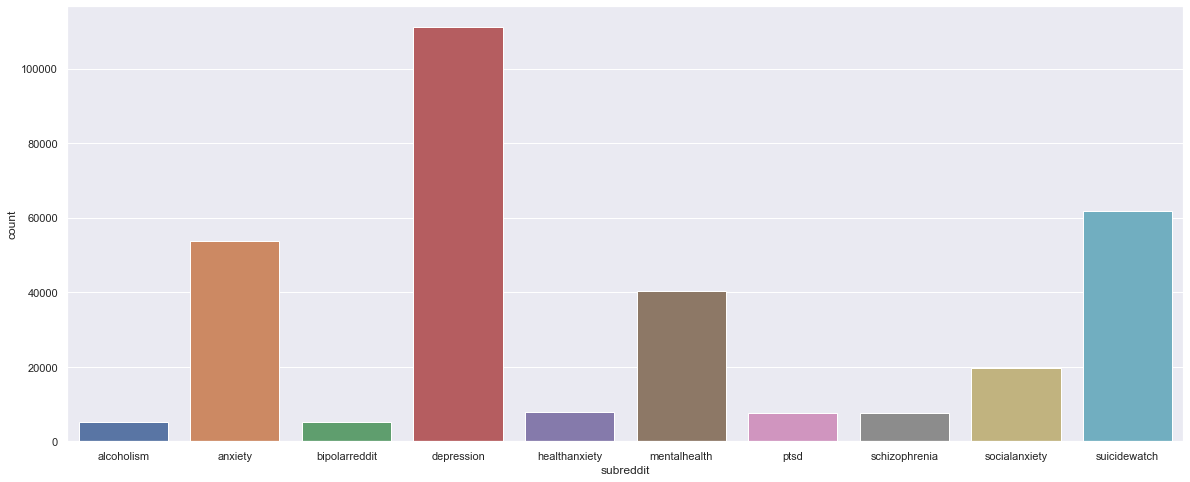

In [60]:
%matplotlib inline
sns.set(style='darkgrid')
plt.figure(figsize=(20,8))
ax = sns.countplot(x='subreddit', data=reddit_df)
plt.savefig('counts.png')

In [61]:
#Distribution of post lengths within each mental health category

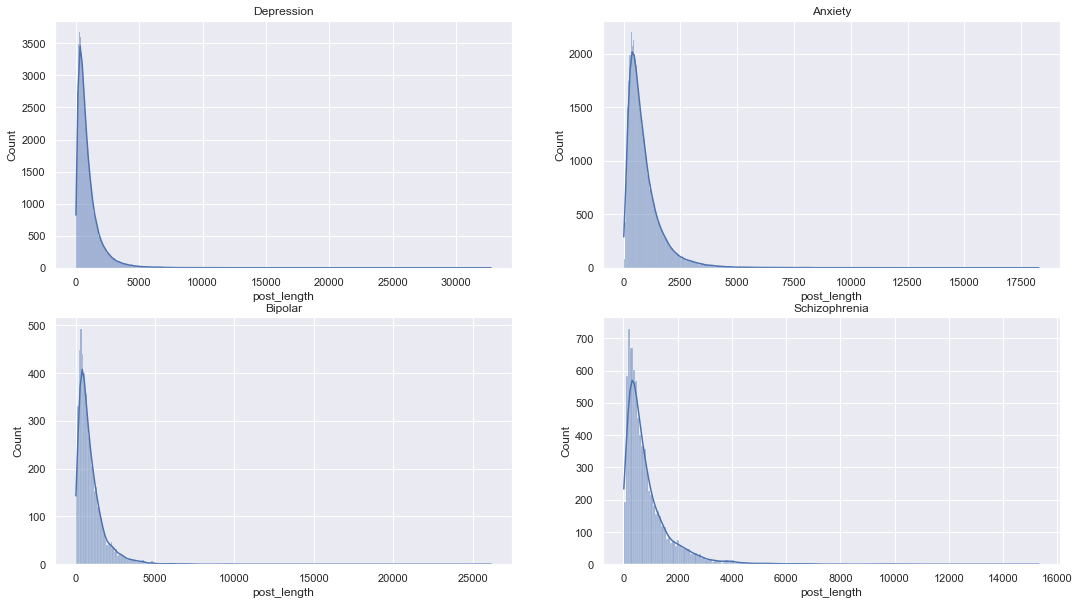

In [62]:
reddit_df['post_length'] = reddit_df['post'].str.len()


fig = plt.figure(figsize=(18,10))

rows=2
columns = 2

fig.add_subplot(rows, columns, 1)
sns.histplot(reddit_df['post_length'][reddit_df['subreddit'] == 'depression'], kde=True)
#plt.axis('off')
plt.title('Depression')

fig.add_subplot(rows, columns, 2)
sns.histplot(reddit_df['post_length'][reddit_df['subreddit'] == 'anxiety'], kde=True)
#plt.axis('off')
plt.title('Anxiety')

fig.add_subplot(rows, columns, 3)
sns.histplot(reddit_df['post_length'][reddit_df['subreddit'] == 'bipolarreddit'], kde=True)
#plt.axis('off')
plt.title('Bipolar')

fig.add_subplot(rows, columns, 4)
sns.histplot(reddit_df['post_length'][reddit_df['subreddit'] == 'schizophrenia'], kde=True)
#plt.axis('off')
plt.title('Schizophrenia')


plt.savefig('post_length.png')
reddit_df['post_length'].describe()

plt.show()


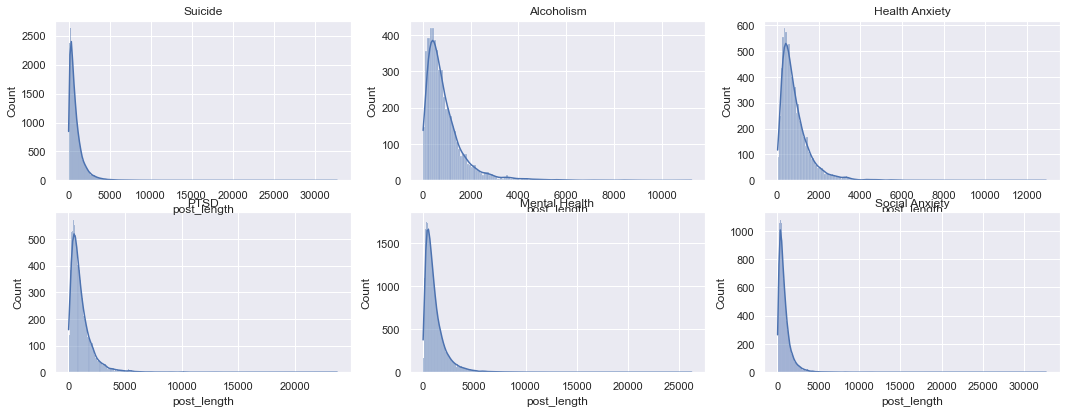

In [63]:
reddit_df['post_length'] = reddit_df['post'].str.len()


fig = plt.figure(figsize=(18,10))

rows=3
columns = 3

fig.add_subplot(rows, columns, 5)
sns.histplot(reddit_df['post_length'][reddit_df['subreddit'] == 'alcoholism'], kde=True)
#plt.axis('off')
plt.title('Alcoholism')

fig.add_subplot(rows, columns, 6)
sns.histplot(reddit_df['post_length'][reddit_df['subreddit'] == 'healthanxiety'], kde=True)
#plt.axis('off')
plt.title('Health Anxiety')

fig.add_subplot(rows, columns, 7)
sns.histplot(reddit_df['post_length'][reddit_df['subreddit'] == 'ptsd'], kde=True)
#plt.axis('off')
plt.title('PTSD')


fig.add_subplot(rows, columns, 8)
sns.histplot(reddit_df['post_length'][reddit_df['subreddit'] == 'mentalhealth'], kde=True)
#plt.axis('off')
plt.title('Mental Health')

fig.add_subplot(rows, columns, 9)
sns.histplot(reddit_df['post_length'][reddit_df['subreddit'] == 'socialanxiety'], kde=True)
#plt.axis('off')
plt.title('Social Anxiety')


fig.add_subplot(rows, columns, 4)
sns.histplot(reddit_df['post_length'][reddit_df['subreddit'] == 'suicidewatch'], kde=True)
#plt.axis('off')
plt.title('Suicide')


plt.savefig('post_length.png')
reddit_df['post_length'].describe()

plt.show()








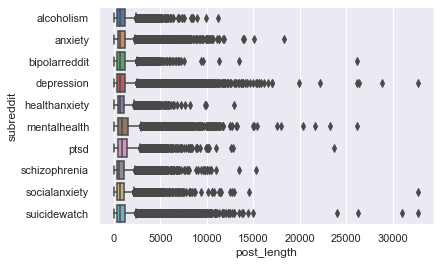

<Figure size 1440x576 with 0 Axes>

In [64]:
sns.boxplot(data=reddit_df, x='post_length', y='subreddit')
plt.figure(figsize=(20,8))
plt.show()

In [65]:
#TEXT PREPROCESSING


In [66]:
#p_test = pd.read_csv('TrainSA.csv')
reddit_df.post=reddit_df.post.astype(str)

In [67]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to C:\Users\Adhi
[nltk_data]     Rajan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [68]:
#Data Cleaning - Content Field
#Reddit posts are storied as a list of string values. To process each string value in the list, iterate the function over each string item in the list. Then return formatted lists
# to string format

print(reddit_df['post'][95])

lowercase_posts = []
for i in reddit_df.index:
    lowercase_posts.append(reddit_df['post'][i].lower())

reddit_df['post'] = lowercase_posts

print('          ')
print(reddit_df['post'][95])

#Remove punctuation from posts
strip_punctuation = []
for i in reddit_df.index:
    strip_punctuation.append(reddit_df['post'][i].translate(str.maketrans('','',string.punctuation)))

reddit_df['post'] = strip_punctuation
print('          ')
print(reddit_df['post'][95])

#Tokenize each string input to generate list of lists containing string values
tokenized_posts = []
for i in reddit_df.index:
    tokenized_posts.append(word_tokenize(reddit_df['post'][i]))

reddit_df['post'] = tokenized_posts
print('          ')
print(reddit_df['post'][95])

#Remove stopwords

filtered_posts = []
for i in reddit_df.index:
    filtered_posts.append([w for w in reddit_df['post'][i] if w not in stopwords])
    
reddit_df['post'] = filtered_posts
print('          ')
print(reddit_df['post'][95])

#Convert processed text from list to string

new_strings = []
for i in reddit_df.index:
    new_strings.append(' '.join(reddit_df['post'][i]))

reddit_df['post'] = new_strings
print('          ')
print(reddit_df['post'][95])

wn = WordNetLemmatizer()
lemmatized_posts = []

for i in reddit_df.index:
    lemmatized_content = []
    post = reddit_df['post'][i]
    post_words = post.split(" ")
    for word in post_words:
        lemmatized_content.append(wn.lemmatize(word, pos='v'))
    lemmatized_post = " ".join(lemmatized_content)
    lemmatized_posts.append(lemmatized_post)

reddit_df['post'] = lemmatized_posts
print('          ')
print(reddit_df['post'][95])

#reddit_df

Ive come to the conclusion Im an alcoholic Today I fucked up by starting my morning with my usual Natty Daddy. After working an hour I asked for a sick day. Bought a fifth of vodka on the way home. Drank 3/4 and blacked out before noon. Woke in piss on the couch.

I usually drink at least 2 natty daddys a day. It doesnt seem like much, but Im miserable without it. I drink what I buy, so I try to manage my habits by œtrying to buy one at a time. Things always go wrong if I break that rule, like today.

Im hardly ever drunk, and never hung over. Work and sleep is when I need it most. Im always dehydrated and sleep deprived. Dark rings under my eyes and no color to my skin is raising eyebrows at work.

TLDR; drinking a minimum of 2 natty daddys a day up to consuming fifths lasting 2 Days, am I endangering myself by quitting cold turkey? Or is it hard to say and differs that much from person to person.

Edit: would like to add Ive got an enlarged heart from drug abuse and my liver probabl

In [69]:
#Numeric values are assigned to mental health categories by creating a dictionary of key value pairs in order to format the data for input into predictive models.

In [70]:
# Counter({'alcoholism': 5084,
#          'anxiety': 53797,
#          'bipolarreddit': 5186,
#          'depression': 111127,
#          'healthanxiety': 7848,
#          'mentalhealth': 40273,
#          'ptsd': 7552,
#          'schizophrenia': 7663,
#          'socialanxiety': 19651,
#          'suicidewatch': 61833})

In [71]:
topic_codes = {'alcoholism' : 0,
                      'anxiety' : 1,
                      'bipolarreddit' : 2,
                      'depression' : 3,
                        'healthanxiety' : 4,
                      'mentalhealth' : 5,
                      'ptsd' : 6,
                        'schizophrenia' : 7,
                      'socialanxiety' : 8,
                      'suicidewatch' : 9            
              
              
              }

reddit_df['topic_code'] = reddit_df['subreddit']
reddit_df = reddit_df.replace({'topic_code':topic_codes})

reddit_df[['post','subreddit','topic_code']].sample(frac=1).head()

,post,subreddit,topic_code
91126,ive worst depression dream yet synopsis one cl...,depression,3
45272,ladies struggle talk even datingrelationship b...,anxiety,1
258057,certain kind social anxiety 23 almost 24 idk w...,socialanxiety,8
102031,try work depression try wake every day reasona...,depression,3
254836,cant dance cant let loose everyone 28 easier t...,socialanxiety,8


In [72]:
#TF IDF AND N GRAMS 

In [73]:
ngram_range = (1,2)
min_df = 0
max_df = 1.0
max_features = 500  #We'll use 500 features as it is well above the average post length
stop_words = stopwords

In [74]:
#KFold & Train-Test Split Preparation

In [75]:
#Here data is prepared for use with cross_val_scores, using KFold cross validation
tfidf = TfidfVectorizer(encoding = 'utf-8', 
                       ngram_range = ngram_range,
                       min_df = min_df,
                       max_df = max_df,
                       lowercase=False, 
                       max_features = max_features,
                       stop_words = None, 
                       norm = 'l2', 
                       sublinear_tf = True)

x = tfidf.fit_transform(reddit_df['post']).toarray()
y = reddit_df['topic_code']
print(x.shape)

(320059, 500)


In [76]:
#Here, data is split into training and testing data for quick sample testing & confusion matrix

x_train, x_test, y_train, y_test = train_test_split(reddit_df['post'], reddit_df['topic_code'], test_size = 0.20, random_state=9)

tfidf = TfidfVectorizer(encoding = 'utf-8', 
                       ngram_range = ngram_range,
                       min_df = min_df,
                       max_df = max_df,
                       lowercase=False, 
                       max_features = max_features,
                       stop_words = None, 
                       norm = 'l2', 
                       sublinear_tf = True)

features_train = tfidf.fit_transform(x_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(x_test).toarray()
labels_test = y_test
print(features_test.shape)


(256047, 500)
(64012, 500)


In [77]:
#Check which words occur most frequently in the training dataset:
wordcounts = Counter(' '.join(x_train).split()).most_common()
wordcounts[:25]

[('feel', 381662),
 ('get', 331535),
 ('like', 323088),
 ('dont', 303610),
 ('go', 278148),
 ('know', 243462),
 ('want', 235823),
 ('ive', 204881),
 ('think', 195898),
 ('time', 182217),
 ('make', 169514),
 ('life', 159122),
 ('cant', 149745),
 ('really', 149409),
 ('people', 145229),
 ('even', 144019),
 ('try', 127188),
 ('help', 126271),
 ('anxiety', 119811),
 ('would', 115526),
 ('one', 115342),
 ('say', 112090),
 ('work', 108933),
 ('take', 104667),
 ('tell', 99175)]

In [78]:
#View words used as features in TFIDF
features_example = tfidf.get_feature_names()
features_example[:25]

['10',
 'able',
 'absolutely',
 'abuse',
 'accept',
 'act',
 'actually',
 'advice',
 'afraid',
 'age',
 'ago',
 'alive',
 'almost',
 'alone',
 'already',
 'also',
 'always',
 'amp',
 'ampx200b',
 'angry',
 'another',
 'answer',
 'anxiety',
 'anxious',
 'anymore']

In [79]:
x_train[0]

'need quit young 22m go hardcore withdrawls anxiety feel like die go hospital hear die alcohol withdrawls sign look sorry really scar dont wan na die hardest withdrawl ive ever deal drink energy drink last night fuck tweeking mess stock fluids dribking hella water poweraid need tip fuck alcohol hard quit'

In [80]:
features_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.22224506, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [81]:
#Chi2 Correlation Analysis

In [82]:
for Subreddit, topic_code in sorted(topic_codes.items()):
    features_chi2 = chi2(features_train, labels_train == topic_code)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [w for w in feature_names if len(w.split(' '))==1]
    bigrams = [w for w in feature_names if len(w.split(' '))==2]
    print("# '{}':".format(Subreddit))
    print("  . Top correlated unigrams:\n    . {}".format('\n    . '.join(unigrams[-10:])))
    print("  . Top correlated bigrams:\n    . {}".format('\n    . '.join(bigrams[-3:])))

# 'alcoholism':
  . Top correlated unigrams:
    . anxiety
    . day
    . hes
    . week
    . stop
    . days
    . problem
    . night
    . quit
    . drink
  . Top correlated bigrams:
    . panic attack
    . want die
    . feel like
# 'anxiety':
  . Top correlated unigrams:
    . depress
    . fear
    . worry
    . suicide
    . kill
    . calm
    . panic
    . anxious
    . attack
    . anxiety
  . Top correlated bigrams:
    . want die
    . anyone else
    . panic attack
# 'bipolarreddit':
  . Top correlated unigrams:
    . doctor
    . take
    . side
    . medication
    . experience
    . effect
    . disorder
    . psychiatrist
    . diagnose
    . meds
  . Top correlated bigrams:
    . dont know
    . social anxiety
    . anyone else
# 'depression':
  . Top correlated unigrams:
    . motivation
    . ptsd
    . sad
    . happy
    . anxious
    . attack
    . panic
    . depress
    . anxiety
    . depression
  . Top correlated bigrams:
    . mental health
    . social 

In [84]:
#MODEL EVALUATION

In [85]:
# #Get current parameters
# from sklearn.naive_bayes import MultinomialNB
# mnb = MultinomialNB()
# print(mnb.get_params())

# #For Naive Bayes, the parameters will be left unchanged

In [86]:
# #Using KFold cross validation. Splitting into train and test data is taken care of for each iteration, so declaring x_train, x_test etc. is not necessary. Based on low variation 
# #in fold scores for each metric, mean is selected to determine the value for each metric to assign to the model.
# cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

# model_evaluation_kfold_mnb = {}
# accuracy_scores = cross_val_score(mnb, x, y, cv=cv, scoring = 'accuracy')
# print('Accuracy Fold Scores')
# print(accuracy_scores)
# model_evaluation_kfold_mnb.update({'Accuracy': accuracy_scores.mean()})

# print('Precision Fold Scores')
# precision_scores = cross_val_score(mnb, x, y, cv=cv, scoring = 'precision_weighted') 
# print(precision_scores)
# model_evaluation_kfold_mnb.update({'Precision': precision_scores.mean()})

# print('Recall Fold Scores')
# recall_scores = cross_val_score(mnb, x, y, cv=cv, scoring = 'recall_weighted') 
# print(recall_scores)
# model_evaluation_kfold_mnb.update({'Recall': recall_scores.mean()})

# print('F1 Fold Scores')
# f1_scores = cross_val_score(mnb, x, y, cv=cv, scoring = 'f1_weighted')
# print(f1_scores)
# model_evaluation_kfold_mnb.update({'F1': f1_scores.mean()})

# model_evaluation_kfold_mnb

In [87]:
# #To generate Confusion Matrix, use train test split as a sample and perform 
# from sklearn.naive_bayes import MultinomialNB
# mnb = MultinomialNB()

# #Fit model to training data
# mnb_model = mnb.fit(features_train, labels_train)

# #Predict outputs from the model using our test data
# mnb_predictions = mnb_model.predict(features_test)

# #Print model evaluation report
# print ("Multiple Naive Bayes Classification Report")
# print(classification_report(labels_test, mnb_predictions))

# #Confusion Matrix

# figure(figsize=(8, 6), dpi=80)
# cfmatrix = confusion_matrix(labels_test, mnb_predictions)
# sns.heatmap(cfmatrix, annot=True, xticklabels=['alcoholism','anxiety','bipolarreddit','depression','healthanxiety','mentalhealth', 'ptsd','schizophrenia','socialanxiety','suicidewatch'], yticklabels=['alcoholism','anxiety','bipolarreddit','depression','healthanxiety','mentalhealth','ptsd','schizophrenia','socialanxiety','suicidewatch'])

# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.title('Naive Bayes Confusion Matrix')

# #Create dictionary to store values for model comparison. Include model accuracy on both Training and Testing data to ensure model isn't overfit

# model_evaluation = {'Naive Bayes' : [accuracy_score(labels_train, mnb.predict(features_train)),accuracy_score(labels_test, mnb_predictions)]}

# model_evaluation

In [88]:
# Counter({'alcoholism': 5084,
#          'anxiety': 53797,
#          'bipolarreddit': 5186,
#          'depression': 111127,
#          'healthanxiety': 7848,
#          'mentalhealth': 40273,
#          'ptsd': 7552,
#          'schizophrenia': 7663,
#          'socialanxiety': 19651,
#          'suicidewatch': 61833})


# 'alcoholism'
#          'anxiety': 53797,
#          'bipolarreddit': 5186,
#          'depression': 111127,
#          'healthanxiety': 7848,
#          'mentalhealth': 40273,
#          'ptsd': 7552,
#          'schizophrenia': 7663,
#          'socialanxiety': 19651,
#          'suicidewatch': 61833})


### Logistic Regression

In [89]:
#Get current parameters
from sklearn.linear_model import LogisticRegression
lgreg = LogisticRegression()
print(lgreg.get_params())
#In order to use logistic regression for multiclass (non-binary) classification, we have to set the multi_class parameter. We will choose OVR (One vs Rest) Classification

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [90]:
#One vs Rest and Multinomial classification will be tested
lgreg = LogisticRegression(multi_class='ovr', max_iter = 300) #One vs rest classification
lgregm = LogisticRegression(multi_class='multinomial', max_iter = 300) #Multinomial classification

In [91]:
#Using KFold cross validation for One vs rest classification
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

model_evaluation_kfold_lgreg = {}
accuracy_scores = cross_val_score(lgreg, x, y, cv=cv, scoring = 'accuracy')
print('Accuracy Fold Scores')
print(accuracy_scores)
model_evaluation_kfold_lgreg.update({'Accuracy': accuracy_scores.mean()})

print('Precision Fold Scores')
precision_scores = cross_val_score(lgreg, x, y, cv=cv, scoring = 'precision_weighted') 
print(precision_scores)
model_evaluation_kfold_lgreg.update({'Precision': precision_scores.mean()})

print('Recall Fold Scores')
recall_scores = cross_val_score(lgreg, x, y, cv=cv, scoring = 'recall_weighted') 
print(recall_scores)
model_evaluation_kfold_lgreg.update({'Recall': recall_scores.mean()})

print('F1 Fold Scores')
f1_scores = cross_val_score(lgreg, x, y, cv=cv, scoring = 'f1_weighted')
print(f1_scores)
model_evaluation_kfold_lgreg.update({'F1': f1_scores.mean()})

model_evaluation_kfold_lgreg

Accuracy Fold Scores
[0.60405861 0.60569893 0.59966881 0.60449603 0.60204337 0.60251203
 0.60088733 0.59777854 0.60388677 0.5982472 ]
Precision Fold Scores
[0.59928357 0.6019779  0.59500158 0.60036473 0.59922878 0.59798865
 0.59641027 0.59317898 0.59925439 0.594028  ]
Recall Fold Scores
[0.60405861 0.60569893 0.59966881 0.60449603 0.60204337 0.60251203
 0.60088733 0.59777854 0.60388677 0.5982472 ]
F1 Fold Scores
[0.58890413 0.59139938 0.58478021 0.58942178 0.58766733 0.58753395
 0.58665786 0.58304396 0.5895786  0.58345349]


{'Accuracy': 0.6019277635443354,
 'Precision': 0.5976716849825199,
 'Recall': 0.6019277635443354,
 'F1': 0.5872440681915427}

In [92]:
#Test with Multinomial Classification
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

model_evaluation_kfold_lgregm = {}
accuracy_scores = cross_val_score(lgregm, x, y, cv=cv, scoring = 'accuracy')
print('Accuracy Fold Scores')
print(accuracy_scores)
model_evaluation_kfold_lgregm.update({'Accuracy': accuracy_scores.mean()})

print('Precision Fold Scores')
precision_scores = cross_val_score(lgregm, x, y, cv=cv, scoring = 'precision_weighted') 
print(precision_scores)
model_evaluation_kfold_lgregm.update({'Precision': precision_scores.mean()})

print('Recall Fold Scores')
recall_scores = cross_val_score(lgregm, x, y, cv=cv, scoring = 'recall_weighted') 
print(recall_scores)
model_evaluation_kfold_lgregm.update({'Recall': recall_scores.mean()})

print('F1 Fold Scores')
f1_scores = cross_val_score(lgregm, x, y, cv=cv, scoring = 'f1_weighted')
print(f1_scores)
model_evaluation_kfold_lgregm.update({'F1': f1_scores.mean()})

model_evaluation_kfold_lgregm

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

Accuracy Fold Scores
[0.6036212  0.60490221 0.59849716 0.60276198 0.60209023 0.60046554
 0.60112166 0.59821596 0.60352746 0.59998125]
Precision Fold Scores


C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[0.5980347  0.59964262 0.59240528 0.59659505 0.59814294 0.59462873
 0.59530929 0.59293986 0.59800446 0.59475651]
Recall Fold Scores


C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[0.6036212  0.60490221 0.59849716 0.60276198 0.60209023 0.60046554
 0.60112166 0.59821596 0.60352746 0.59998125]
F1 Fold Scores


C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

[0.59158167 0.59353681 0.58658291 0.5905932  0.5904414  0.58843521
 0.58976102 0.58654405 0.59191178 0.58836721]


C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Accuracy': 0.6015184652877585,
 'Precision': 0.5960459425340348,
 'Recall': 0.6015184652877585,
 'F1': 0.5897755267025533}

Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.72      0.61      0.66       985
           1       0.68      0.70      0.69     10845
           2       0.35      0.05      0.08      1036
           3       0.57      0.77      0.66     22122
           4       0.67      0.45      0.54      1575
           5       0.51      0.30      0.38      8094
           6       0.72      0.51      0.59      1532
           7       0.48      0.23      0.31      1512
           8       0.63      0.48      0.55      3888
           9       0.62      0.58      0.60     12423

    accuracy                           0.60     64012
   macro avg       0.59      0.47      0.51     64012
weighted avg       0.60      0.60      0.59     64012



NameError: name 'model_evaluation' is not defined

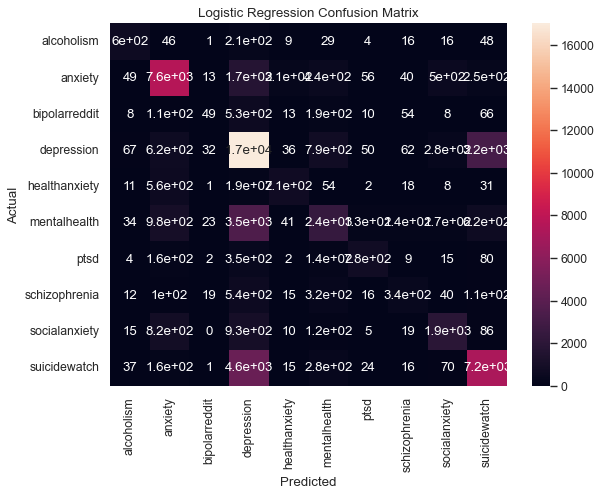

In [93]:
#One vs Rest classification is selected due to slightly higher evaluation metrics and lower runtime. Again the model is run on a sample 80:20 train test split
#to produce a confusion matrix.
lgreg = LogisticRegression(multi_class='ovr', max_iter = 300)
lgreg_model = lgreg.fit(features_train, labels_train)
lgreg_predictions = lgreg_model.predict(features_test)

#Print model evaluation report
print ("Logistic Regression Classification Report")
print(classification_report(labels_test, lgreg_predictions))

#Confusion Matrix
figure(figsize=(8, 6), dpi=80)
cfmatrix = confusion_matrix(labels_test, lgreg_predictions)
sns.heatmap(cfmatrix, annot=True, xticklabels=['alcoholism','anxiety','bipolarreddit','depression','healthanxiety','mentalhealth','ptsd','schizophrenia','socialanxiety','suicidewatch'], yticklabels=['alcoholism','anxiety','bipolarreddit','depression','healthanxiety','mentalhealth','ptsd','schizophrenia','socialanxiety','suicidewatch'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Logistic Regression Confusion Matrix')

#Add values for model comparison
model_evaluation.update({'Logistic Regression' : [accuracy_score(labels_train, lgreg.predict(features_train)),accuracy_score(labels_test, lgreg_predictions)]})

In [ ]:
#MODEL COMPARISON

In [153]:
# #View model performance on both training and test data from 1-fold sample run to test for overfitting
# model_fit = pd.DataFrame.from_dict(model_evaluation.items())
# model_fit = model_fit.rename(columns={0:'Model', 1:'Testing_Accuracy'})
# model_fit[['Training Accuracy','Testing Accuracy']] = pd.DataFrame(model_fit.Testing_Accuracy.tolist(), index = model_fit.index)

# model_fit = model_fit[['Model','Training Accuracy','Testing Accuracy']]

# model_fit

In [154]:
# #View model performance on both training and test data from 1-fold sample run to test for overfitting
# model_fit = pd.DataFrame.from_dict(model_evaluation.items())
# model_fit = model_fit.rename(columns={0:'Model', 1:'Testing_Accuracy'})
# model_fit[['Training Accuracy','Testing Accuracy']] = pd.DataFrame(model_fit.Testing_Accuracy.tolist(), index = model_fit.index)

# model_fit = model_fit[['Model','Training Accuracy','Testing Accuracy']]

# model_fit

In [155]:
# #Compare performance metrics from K-fold cross validation across all models
# #mnb_kfold = pd.DataFrame.from_dict(model_evaluation_kfold_mnb.items()).transpose()
# lgreg_kfold = pd.DataFrame.from_dict(model_evaluation_kfold_lgreg.items()).transpose()
# #knn_kfold = pd.DataFrame.from_dict(model_evaluation_kfold_knn.items()).transpose()

# #model_eval = mnb_kfold.iloc[[1]].append(lgreg_kfold.iloc[[1]])

# model_eval.index = ['Logistic Regression']
# model_eval.columns = ['Accuracy','Precision','Recall','F1 Score']

# model_eval

In [ ]:
#Determining the Most Important Features for Classification in our Selected Model

In [95]:
#Store dictionary of tf_idf features and their corresponding index in the array. This method returns a dictionary with each feature and it's index in the transformed training set
tfidf_values = tfidf.vocabulary_

#define function to retrieve a feature based on it's given index
def get_feature_from_index(v):
    for k, value in tfidf_values.items():
        if value == v:
            return k

#store coefficient values for each feature from logistic regression model for given topic
depression_feature_importance = lgreg_model.coef_[3]  # 0 corresponds to Depression topic classification

#Iterate over each feature and retrieve both the feature name and its corresponding coefficient to determine importance of each feature in classification for a given topic
coefficients = {}
for i,v in enumerate(depression_feature_importance):
    scores = {get_feature_from_index(i): (depression_feature_importance[i])}
    coefficients.update(scores)
    
top_features_depression = sorted(coefficients.items(), key=lambda x: x[1], reverse=True)

print('Depression - Top Features')
print('               ')
print(*top_features_depression[0:25], sep='\n')
print('               ')
print('---------------')

#Repeat for each category

anxiety_feature_importance = lgreg_model.coef_[1]  # 1 corresponds to Anxiety topic classification

coefficients = {}
for i,v in enumerate(anxiety_feature_importance):
    scores = {get_feature_from_index(i): (anxiety_feature_importance[i])}
    coefficients.update(scores)
    
top_features_anxiety = sorted(coefficients.items(), key=lambda x: x[1], reverse=True)

print('Anxiety - Top Features')
print('               ')
print(*top_features_anxiety[0:25], sep='\n')
print('               ')
print('---------------')


bipolar_feature_importance = lgreg_model.coef_[2]  # 2 corresponds to Bipolar topic classification

coefficients = {}
for i,v in enumerate(bipolar_feature_importance):
    scores = {get_feature_from_index(i): (bipolar_feature_importance[i])}
    coefficients.update(scores)
    
top_features_bipolar = sorted(coefficients.items(), key=lambda x: x[1], reverse=True)

print('Bipolar - Top Features')
print('               ')
print(*top_features_bipolar[0:25], sep='\n')
print('               ')
print('---------------')


schizophrenia_feature_importance = lgreg_model.coef_[7]  # 3 corresponds to Schizophrenia topic classification

coefficients = {}
for i,v in enumerate(schizophrenia_feature_importance):
    scores = {get_feature_from_index(i): (schizophrenia_feature_importance[i])}
    coefficients.update(scores)
    
top_features_schizophrenia = sorted(coefficients.items(), key=lambda x: x[1], reverse=True)

print('Schizophrenia - Top Features')
print('               ')
print(*top_features_schizophrenia[0:25], sep='\n')
print('               ')
print('---------------')

alcoholism_feature_importance = lgreg_model.coef_[0]  # 3 corresponds to Schizophrenia topic classification

coefficients = {}
for i,v in enumerate(alcoholism_feature_importance):
    scores = {get_feature_from_index(i): (alcoholism_feature_importance[i])}
    coefficients.update(scores)
    
top_features_alcoholism = sorted(coefficients.items(), key=lambda x: x[1], reverse=True)

print('Alcoholism - Top Features')
print('               ')
print(*top_features_alcoholism[0:25], sep='\n')
print('               ')
print('---------------')


healthanxiety_feature_importance = lgreg_model.coef_[4]  # 3 corresponds to Schizophrenia topic classification

coefficients = {}
for i,v in enumerate(healthanxiety_feature_importance):
    scores = {get_feature_from_index(i): (healthanxiety_feature_importance[i])}
    coefficients.update(scores)
    
top_features_healthanxiety = sorted(coefficients.items(), key=lambda x: x[1], reverse=True)

print('Health Anxiety - Top Features')
print('               ')
print(*top_features_healthanxiety[0:25], sep='\n')
print('               ')
print('---------------')


mentalhealth_feature_importance = lgreg_model.coef_[5]  # 3 corresponds to Schizophrenia topic classification

coefficients = {}
for i,v in enumerate(mentalhealth_feature_importance):
    scores = {get_feature_from_index(i): (mentalhealth_feature_importance[i])}
    coefficients.update(scores)
    
top_features_mentalhealth = sorted(coefficients.items(), key=lambda x: x[1], reverse=True)

print('Mental Health - Top Features')
print('               ')
print(*top_features_mentalhealth[0:25], sep='\n')
print('               ')
print('---------------')



ptsd_feature_importance = lgreg_model.coef_[6]  # 3 corresponds to Schizophrenia topic classification

coefficients = {}
for i,v in enumerate(ptsd_feature_importance):
    scores = {get_feature_from_index(i): (ptsd_feature_importance[i])}
    coefficients.update(scores)
    
top_features_ptsd = sorted(coefficients.items(), key=lambda x: x[1], reverse=True)

print('PTSD - Top Features')
print('               ')
print(*top_features_ptsd[0:25], sep='\n')
print('               ')
print('---------------')



socialanxiety_feature_importance = lgreg_model.coef_[8]  # 3 corresponds to Schizophrenia topic classification

coefficients = {}
for i,v in enumerate(socialanxiety_feature_importance):
    scores = {get_feature_from_index(i): (socialanxiety_feature_importance[i])}
    coefficients.update(scores)
    
top_features_socialanxiety = sorted(coefficients.items(), key=lambda x: x[1], reverse=True)

print('Social Anxiety - Top Features')
print('               ')
print(*top_features_socialanxiety[0:25], sep='\n')
print('               ')
print('---------------')


suicidewatch_feature_importance = lgreg_model.coef_[9]  # 3 corresponds to Schizophrenia topic classification

coefficients = {}
for i,v in enumerate(suicidewatch_feature_importance):
    scores = {get_feature_from_index(i): (suicidewatch_feature_importance[i])}
    coefficients.update(scores)
    
top_features_suicidewatch = sorted(coefficients.items(), key=lambda x: x[1], reverse=True)

print('Suicide - Top Features')
print('               ')
print(*top_features_socialanxiety[0:25], sep='\n')
print('               ')
print('---------------')



#          9'suicidewatch': 61846})

# 0'alcoholism': 5084,
# 1         'anxiety': 53797,
#  2        'bipolarreddit': 5186,
#   3       'depression': 111128,
#    4      'healthanxiety': 7849,
#     5     'mentalhealth': 40295,
#      6    'ptsd': 7553,
#       7   'schizophrenia': 7665,
#        8  'socialanxiety': 19656,
#         9 'suicidewatch': 61846})


Depression - Top Features
               
('depression', 11.139608668146122)
('depress', 5.85296381068991)
('bed', 2.734622213389854)
('motivation', 2.251287507413967)
('feel', 2.1311681212956066)
('happy', 2.0429452783718545)
('sad', 2.0267673550962173)
('cry', 1.8828087598965988)
('lonely', 1.5742705002466546)
('energy', 1.4052455898235616)
('shit', 1.2889986571340877)
('alone', 1.2043301215609685)
('suck', 1.1222743001200293)
('inside', 1.1124397812758169)
('vent', 1.1117156289384889)
('friends', 1.103783317954521)
('life', 1.0715906207558266)
('wish', 1.0491817861390274)
('low', 1.0222045213310638)
('anything', 0.9721290325997077)
('hate', 0.9514215851274317)
('game', 0.9504408743958441)
('lose', 0.9334741423952175)
('better', 0.916443521105484)
('study', 0.8338311174706036)
               
---------------
Anxiety - Top Features
               
('anxiety', 14.72837702509731)
('anxious', 6.449353950572454)
('panic', 4.642972281942665)
('mental health', 4.109507562774888)
('worry', 2

In [ ]:
#TWITTER ANALYSIS 


In [ ]:
#Load twitter corpus
# twitter_df = pd.read_csv('../input/social-media-mental-health-posts/twitter_corpus2.csv', encoding = 'unicode_escape')
# twitter_df = pd.DataFrame(twitter_df)

# twitter_df.head()

In [96]:
twitter_df = pd.read_excel('C:/AR Files/FBARBP/Data/finaltwitter.xlsx')
twitter_df = pd.DataFrame(twitter_df)
#reddit_df = reddit_df[reddit_df['subreddit'].notna()]

In [97]:
#run vizzes later
twitter_df.head()

,id,url,datestamp,content,username,keyword,region,date,time,month,year,dayofweek,weekendyesorno,tweethour
0,0,https://twitter.com/cyberpunk018/status/151446...,2022-04-14 04:29:45+00:00,There's a reason you don't fuck with a drug lo...,cyberpunk018,Drugs,Jacksonville,2022-04-14,04:29:45,Apr,2022,Thursday,Weekday,4
1,1,https://twitter.com/DemandHacker/status/151444...,2022-04-14 03:46:19+00:00,@pmarca Wonder why they have a drug problemâ€¦,DemandHacker,Drugs,Jacksonville,2022-04-14,03:46:19,Apr,2022,Thursday,Weekday,3
2,2,https://twitter.com/geisha_doll/status/1514444...,2022-04-14 03:25:33+00:00,@alpha_2987 @DownAtTheFarmUK @HarmonMcCraw @Th...,geisha_doll,Drugs,Jacksonville,2022-04-14,03:25:33,Apr,2022,Thursday,Weekday,3
3,3,https://twitter.com/aziahzzachare/status/15144...,2022-04-14 02:51:22+00:00,I like music that make me feel like a drug sla...,aziahzzachare,Drugs,Jacksonville,2022-04-14,02:51:22,Apr,2022,Thursday,Weekday,2
4,4,https://twitter.com/wvfilmmaker/status/1514434...,2022-04-14 02:44:10+00:00,@CitizenAndy @scottEmovienerd â€¦ I normally h...,wvfilmmaker,Drugs,Jacksonville,2022-04-14,02:44:10,Apr,2022,Thursday,Weekday,2


In [98]:
twitter_df.shape

(418349, 14)

In [99]:
import seaborn as sns

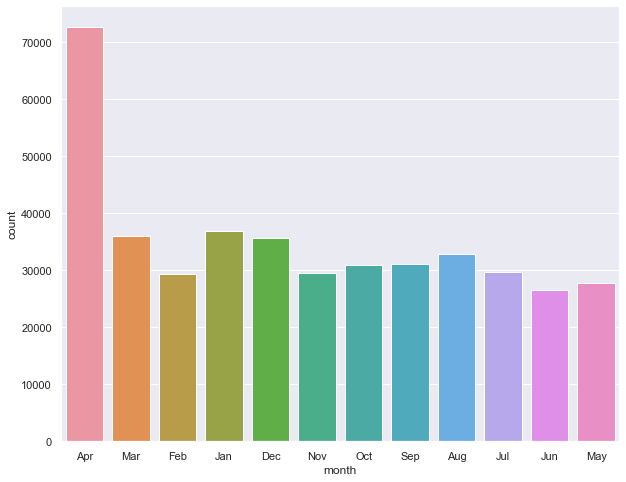

In [100]:
%matplotlib inline
sns.set(style='darkgrid')
plt.figure(figsize=(10,8))
ax = sns.countplot(x='month', data=twitter_df)
plt.savefig('counts.png')

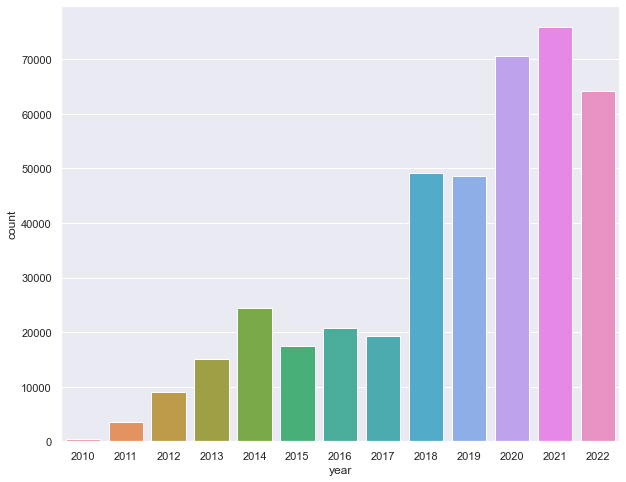

In [101]:
%matplotlib inline
sns.set(style='darkgrid')
plt.figure(figsize=(10,8))
ax = sns.countplot(x='year', data=twitter_df)
plt.savefig('counts.png')

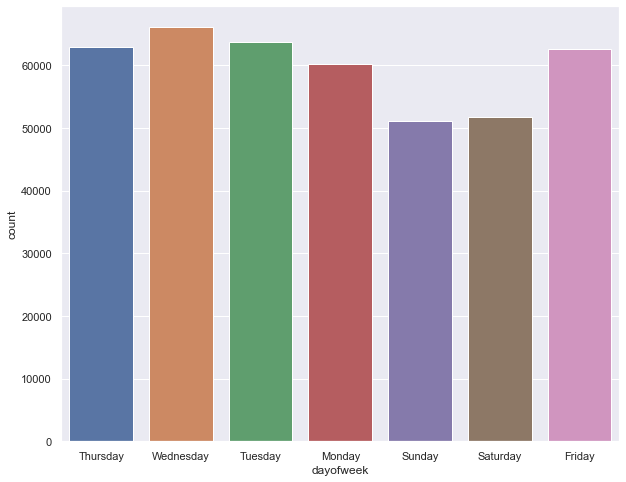

In [102]:
%matplotlib inline
sns.set(style='darkgrid')
plt.figure(figsize=(10,8))
ax = sns.countplot(x='dayofweek', data=twitter_df)
plt.savefig('counts.png')

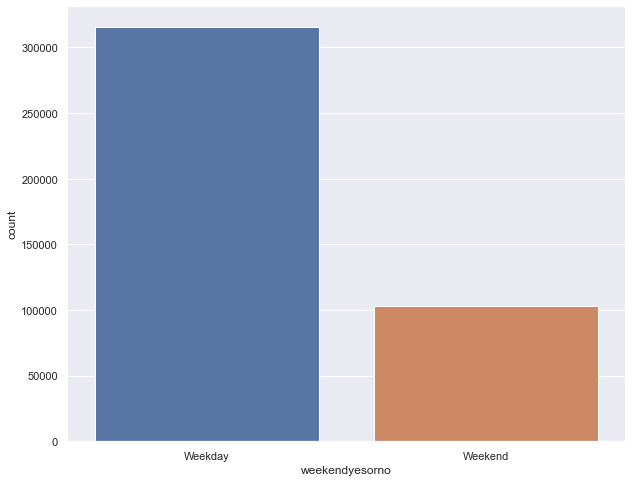

In [103]:
%matplotlib inline
sns.set(style='darkgrid')
plt.figure(figsize=(10,8))
ax = sns.countplot(x='weekendyesorno', data=twitter_df)
plt.savefig('counts.png')

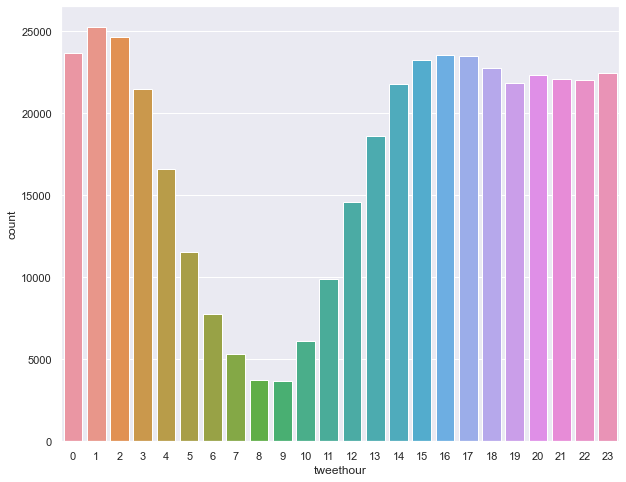

In [104]:
%matplotlib inline
sns.set(style='darkgrid')
plt.figure(figsize=(10,8))
ax = sns.countplot(x='tweethour', data=twitter_df)
plt.savefig('counts.png')

In [105]:
import datetime

In [106]:
twitter_df2 = pd.read_excel('C:/AR Files/FBARBP/Data/finaltwitter2.xlsx')
twitter_df2 = pd.DataFrame(twitter_df2)

In [107]:
twitter_df2.shape

(418349, 3)

In [108]:
twitter_df2.head()

,content,keyword,region
0,There's a reason you don't fuck with a drug lo...,Drugs,Jacksonville
1,@pmarca Wonder why they have a drug problemâ€¦,Drugs,Jacksonville
2,@alpha_2987 @DownAtTheFarmUK @HarmonMcCraw @Th...,Drugs,Jacksonville
3,I like music that make me feel like a drug sla...,Drugs,Jacksonville
4,@CitizenAndy @scottEmovienerd â€¦ I normally h...,Drugs,Jacksonville


In [109]:

#Perform text preprocessing on tweets

#Drop N/A values, and include only posts which have an identified geographic region

twitter_df2 = twitter_df2[twitter_df2['content'].notna()]
twitter_df2 = twitter_df2[twitter_df2['region'].notna()]
twitter_df2 = twitter_df2.drop_duplicates(subset=['content'])

In [110]:

twitter_df2.content=twitter_df2.content.astype(str)

In [111]:
#Text processing
#Data Cleaning - Snippet

print(twitter_df2['content'][0])


#Remove author names from the posts, which are any terms starting with '@'
stripped_authors = []
for i in twitter_df2.index:
   stripped_authors.append(' '.join(w for w in twitter_df2['content'][i].split(' ') if not w.startswith('@')))
    
twitter_df2['content'] = stripped_authors
print(twitter_df2['content'][0])


There's a reason you don't fuck with a drug lord because you know that's a warlord if it's a real drug lord.
There's a reason you don't fuck with a drug lord because you know that's a warlord if it's a real drug lord.


In [112]:
Counter(twitter_df2['region'])

Counter({'Jacksonville': 32014,
         'Panhandle': 32813,
         'Miami': 129272,
         'Tampa': 139787})

In [113]:

#Remove all non-alphanumeric characters to clean up text and remove symbols, emojis, etc.
stripped_strings = []
for i in twitter_df2.index:
    stripped_strings.append(re.sub(r'[^A-Za-z0-9 ]+', '', twitter_df2['content'][i]))
        
twitter_df2['content'] = stripped_strings
print(twitter_df2['content'][0])


Theres a reason you dont fuck with a drug lord because you know thats a warlord if its a real drug lord


In [114]:

#Twitter posts are stored as a list of string values. To process each string value in the list, iterate the function over each string item in the list. Then return formatted lists
# to string format
lowercase_posts = []
for i in twitter_df2.index:
    lowercase_posts.append(twitter_df2['content'][i].lower())

twitter_df2['content'] = lowercase_posts
print(twitter_df2['content'][0])

theres a reason you dont fuck with a drug lord because you know thats a warlord if its a real drug lord


In [115]:

#Remove punctuation from posts
strip_punctuation = []
for i in twitter_df2.index:
    strip_punctuation.append(twitter_df2['content'][i].translate(str.maketrans('','',string.punctuation)))

twitter_df2['content'] = strip_punctuation
print(twitter_df2['content'][0])

theres a reason you dont fuck with a drug lord because you know thats a warlord if its a real drug lord


In [116]:
#Tokenize each string input to generate list of lists containing string values
tokenized_posts = []
for i in twitter_df2.index:
    tokenized_posts.append(word_tokenize(twitter_df2['content'][i]))

twitter_df2['content'] = tokenized_posts
print(twitter_df2['content'][0])

['theres', 'a', 'reason', 'you', 'dont', 'fuck', 'with', 'a', 'drug', 'lord', 'because', 'you', 'know', 'thats', 'a', 'warlord', 'if', 'its', 'a', 'real', 'drug', 'lord']


In [117]:
twitter_df2.shape

(333886, 3)

In [118]:
#Remove stopwords

filtered_posts = []
for i in twitter_df2.index:
    filtered_posts.append([w for w in twitter_df2['content'][i] if w not in stopwords])
    
twitter_df2['content'] = filtered_posts
print(twitter_df2['content'][0])

['theres', 'reason', 'dont', 'fuck', 'drug', 'lord', 'know', 'thats', 'warlord', 'real', 'drug', 'lord']


In [119]:
twitter_df2.shape

(333886, 3)

In [120]:
#Convert processed text from list to string

new_strings = []
for i in twitter_df2.index:
    new_strings.append(' '.join(twitter_df2['content'][i]))

twitter_df2['content'] = new_strings
print(twitter_df2['content'][0])

theres reason dont fuck drug lord know thats warlord real drug lord


In [121]:
twitter_df2.shape

(333886, 3)

In [122]:

#Lemmatize posts
wn = WordNetLemmatizer()
lemmatized_posts = []

for i in twitter_df2.index:
    lemmatized_content = []
    post = twitter_df2['content'][i]
    post_words = post.split(" ")
    for word in post_words:
        lemmatized_content.append(wn.lemmatize(word, pos='v'))
    lemmatized_post = " ".join(lemmatized_content)
    lemmatized_posts.append(lemmatized_post)

twitter_df2['content'] = lemmatized_posts
print(twitter_df2['content'][0])

print('           ')

print('Formatted Dataframe:')

twitter_df2.head()

theres reason dont fuck drug lord know thats warlord real drug lord
           
Formatted Dataframe:


,content,keyword,region
0,theres reason dont fuck drug lord know thats w...,Drugs,Jacksonville
1,wonder drug problem,Drugs,Jacksonville
2,countless areas like yemen syria iraq palestin...,Drugs,Jacksonville
3,like music make feel like drug slang gangsta 2011,Drugs,Jacksonville
4,normally give speech virginia case drug gun ke...,Drugs,Jacksonville


In [123]:
twitter_df2.shape

(333886, 3)

In [139]:
#Transform 
np.set_printoptions(threshold=1000)
tweets = twitter_df2['content']
region = twitter_df2['region']
#Convert Tweets to vectors
tweet_vectors = tfidf.transform(tweets).toarray()


#Run predictive model
tweet_predictions = lgreg_model.predict(tweet_vectors)
tweet_predictions = tweet_predictions.tolist()


#Generate dataframe showing tweet and its predicted mental health indication

tweet_classifications = {'content': tweets,'region': region, 'topic_code' : tweet_predictions}

tweet_df = pd.DataFrame(tweet_classifications)

categories = []
for i in tweet_df.index:
    if tweet_df['topic_code'][i] == 0:
        categories.append('Alcoholism')
    elif tweet_df['topic_code'][i] == 1:
        categories.append('Anxiety')
    elif tweet_df['topic_code'][i] == 2:
        categories.append('Bipolar')
    elif tweet_df['topic_code'][i] == 3:
        categories.append('Depression')
    elif tweet_df['topic_code'][i] == 4:
        categories.append('Health Anxiety')       
    elif tweet_df['topic_code'][i] == 5:
        categories.append('Mental Health')
    elif tweet_df['topic_code'][i] == 6:
        categories.append('PTSD')
    elif tweet_df['topic_code'][i] == 7:
        categories.append('Schizophrenia')
    elif tweet_df['topic_code'][i] == 8:
        categories.append('Social Anxiety')  
    elif tweet_df['topic_code'][i] == 9:
        categories.append('Suicide')         
        
tweet_df['Categories'] = categories

In [140]:
tweet_df.shape

(333886, 4)

In [141]:
tweet_df.head()

,content,region,topic_code,Categories
0,theres reason dont fuck drug lord know thats w...,Jacksonville,3,Depression
1,wonder drug problem,Jacksonville,3,Depression
2,countless areas like yemen syria iraq palestin...,Jacksonville,3,Depression
3,like music make feel like drug slang gangsta 2011,Jacksonville,3,Depression
4,normally give speech virginia case drug gun ke...,Jacksonville,3,Depression


In [142]:
classified_tweets = tweet_df

In [125]:
# 0'alcoholism': 5084,
#  1        'anxiety': 53797,
#   2       'bipolarreddit': 5186,
#    3      'depression': 111128,
#     4     'healthanxiety': 7849,
#      5    'mentalhealth': 40295,
#       6   'ptsd': 7553,
#        7  'schizophrenia': 7665,
#         8 'socialanxiety': 19656,
#           9'suicidewatch': 61846})

In [126]:
# #Merge location data from twitter_df to add additional context for analysis
# classified_tweets = pd.merge(tweet_df, twitter_df, on = 'content', how ='inner')
# classified_tweets = classified_tweets[['content','region','Categories']]
# classified_tweets

In [127]:
# from pathlib import Path  
# filepath = Path('C:/AR Files/FBARBP/Data/out2.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)  
# tweets_df4.to_csv(filepath)  

In [146]:
tweet_df.shape

(333886, 4)

In [147]:
classified_tweets.shape

(333886, 4)

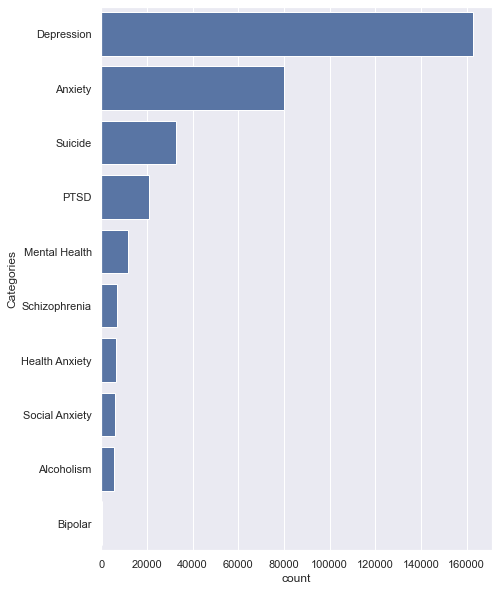

Depression  :  48.782%
Suicide  :  9.806%
Anxiety  :  24.011%
Mental Health  :  3.573%
Schizophrenia  :  2.017%
Bipolar  :  0.09%
PTSD  :  6.22%
Social Anxiety  :  1.862%
Health Anxiety  :  1.913%
Alcoholism  :  1.727%


In [148]:
sns.set_color_codes('pastel')
sns.set(style='darkgrid')
sns.set(rc={'figure.figsize':(7,10)})
sns.countplot(y='Categories', data=classified_tweets, order = classified_tweets['Categories'].value_counts().index, color='b')
plt.show()

categories = []
percentages = []
for i in Counter(classified_tweets['Categories']):
    categories.append(i) 
    percentages.append(str(round(len(classified_tweets[classified_tweets['Categories']==i])/len(classified_tweets),5)*100) + '%')

zipped_values = zip(categories, percentages)
categories_dist = dict(zipped_values)

for k, v in categories_dist.items():
    print(k, ' : ', v)


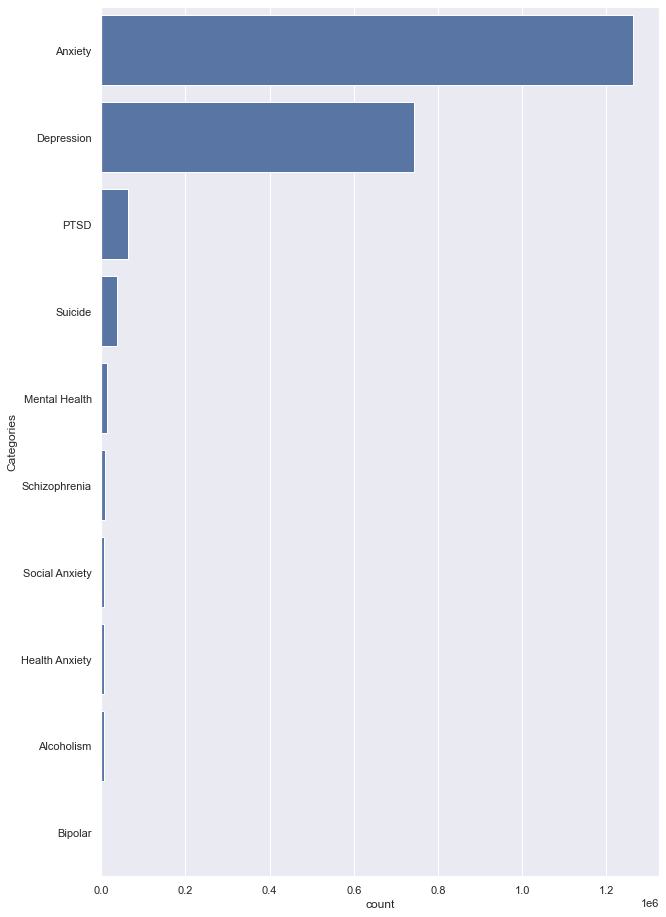

Depression  :  34.561%
Suicide  :  1.704%
Anxiety  :  58.779%
Mental Health  :  0.645%
Schizophrenia  :  0.407%
Bipolar  :  0.016%
PTSD  :  2.97%
Social Anxiety  :  0.308%
Health Anxiety  :  0.307%
Alcoholism  :  0.304%


In [131]:
sns.set_color_codes('pastel')
sns.set(style='darkgrid')
sns.set(rc={'figure.figsize':(10,16)})
sns.countplot(y='Categories', data=classified_tweets, order = classified_tweets['Categories'].value_counts().index, color='b')
plt.show()

categories = []
percentages = []
for i in Counter(classified_tweets['Categories']):
    categories.append(i) 
    percentages.append(str(round(len(classified_tweets[classified_tweets['Categories']==i])/len(classified_tweets),5)*100) + '%')

zipped_values = zip(categories, percentages)
categories_dist = dict(zipped_values)

for k, v in categories_dist.items():
    print(k, ' : ', v)


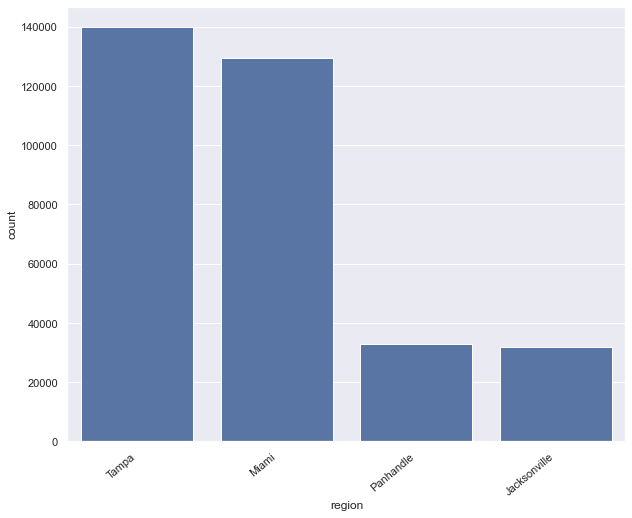

Jacksonville  :  9.588000000000001%
Panhandle  :  9.828000000000001%
Miami  :  38.717%
Tampa  :  41.867%


In [149]:
#View regional breakdown 
provinces = []
percentages = []
for i in Counter(classified_tweets['region']):
    provinces.append(i) 
    percentages.append(str(round(len(classified_tweets[classified_tweets['region']==i])/len(classified_tweets),5)*100) + '%')

zipped_values = zip(provinces, percentages)
regional_dist = dict(zipped_values)

#Plot counts
sns.set_color_codes('pastel')
sns.set(style='darkgrid')
plt.figure(figsize=(10,8))
ax = sns.countplot(x='region', data=classified_tweets, order = classified_tweets['region'].value_counts().index, color='b', label='# of Tweets')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

#Show percentage breakdown
for k, v in regional_dist.items():
    print(k, ' : ', v)


C:\Users\ADHIRA~1\AppData\Local\Temp/ipykernel_16860/3765080843.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')


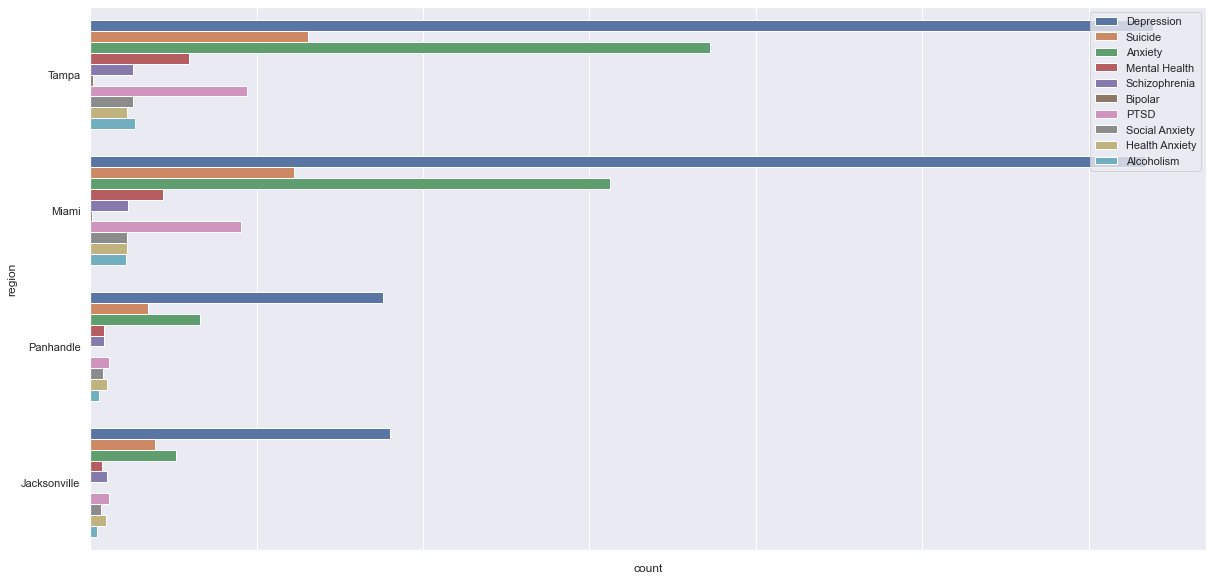

In [150]:
sns.set_color_codes('pastel')
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(y='region', data=classified_tweets, order = classified_tweets['region'].value_counts().index, hue='Categories')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.legend(loc='upper right')
plt.show()

In [180]:
#We can create a dataframe to view the underlying post numbers in our graph

depression = pd.DataFrame(classified_tweets[classified_tweets.Categories=='Depression'].groupby('region')['content'].count())
anxiety = pd.DataFrame(classified_tweets[classified_tweets.Categories=='Anxiety'].groupby('region')['content'].count())
bipolar = pd.DataFrame(classified_tweets[classified_tweets.Categories=='Bipolar'].groupby('region')['content'].count())
schizophrenia = pd.DataFrame(classified_tweets[classified_tweets.Categories=='Schizophrenia'].groupby('region')['content'].count())
alcoholism = pd.DataFrame(classified_tweets[classified_tweets.Categories=='Alcoholism'].groupby('region')['content'].count())
healthanxiety = pd.DataFrame(classified_tweets[classified_tweets.Categories=='Health Anxiety'].groupby('region')['content'].count())
mentalhealth = pd.DataFrame(classified_tweets[classified_tweets.Categories=='Mental Health'].groupby('region')['content'].count())
ptsd = pd.DataFrame(classified_tweets[classified_tweets.Categories=='PTSD'].groupby('region')['content'].count())
socialanxiety = pd.DataFrame(classified_tweets[classified_tweets.Categories=='Social Anxiety'].groupby('region')['content'].count())
suicide = pd.DataFrame(classified_tweets[classified_tweets.Categories=='Suicide'].groupby('region')['content'].count())





regions_merged = pd.concat([depression,anxiety,bipolar,schizophrenia,alcoholism,healthanxiety,mentalhealth,ptsd,socialanxiety,suicide], join='outer', axis=1)

regions_merged.columns = ['Depression','Anxiety','Bipolar','Schizophrenia','Alcoholism','Healthanxiety','Mentalhealth','PTSD','Socialanxiety','Suicidewatch']

regions_merged

,Depression,Anxiety,Bipolar,Schizophrenia,Alcoholism,Healthanxiety,Mentalhealth,PTSD,Socialanxiety,Suicidewatch
region,,,,,,,,,,
Jacksonville,18029,5140,23,1033,428,930,746,1159,650,3876
Miami,63388,31220,94,2307,2138,2238,4358,9061,2189,12279
Panhandle,17611,6581,17,820,511,989,864,1135,787,3498
Tampa,63847,37228,165,2574,2690,2229,5963,9413,2591,13087


In [184]:
regions_merged.head()

,Depression,Anxiety,Bipolar,Schizophrenia,Alcoholism,Healthanxiety,Mentalhealth,PTSD,Socialanxiety,Suicidewatch
region,,,,,,,,,,
Jacksonville,18029,5140,23,1033,428,930,746,1159,650,3876
Miami,63388,31220,94,2307,2138,2238,4358,9061,2189,12279
Panhandle,17611,6581,17,820,511,989,864,1135,787,3498
Tampa,63847,37228,165,2574,2690,2229,5963,9413,2591,13087


In [185]:
regions_merged.to_csv('RM.csv', index=True, header=True)

In [186]:
from pathlib import Path  
filepath = Path('C:/AR Files/FBARBP/Data/RM2.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
regions_merged.to_csv(filepath)

In [187]:
rmfinal = pd.read_csv('C:/AR Files/FBARBP/Data/RM2.csv')  

In [188]:
rmfinal.head()

,region,Depression,Anxiety,Bipolar,Schizophrenia,Alcoholism,Healthanxiety,Mentalhealth,PTSD,Socialanxiety,Suicidewatch
0,Jacksonville,18029,5140,23,1033,428,930,746,1159,650,3876
1,Miami,63388,31220,94,2307,2138,2238,4358,9061,2189,12279
2,Panhandle,17611,6581,17,820,511,989,864,1135,787,3498
3,Tampa,63847,37228,165,2574,2690,2229,5963,9413,2591,13087


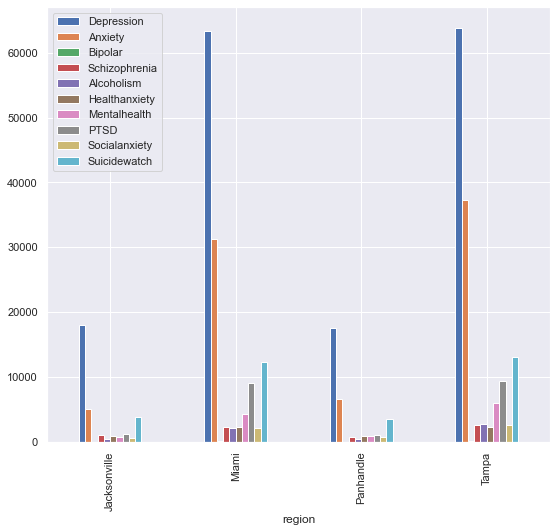

In [201]:
import matplotlib.pyplot as plt 
rmfinal.plot(x="region", y=["Depression","Anxiety","Bipolar","Schizophrenia","Alcoholism","Healthanxiety","Mentalhealth","PTSD","Socialanxiety","Suicidewatch"], kind="bar",figsize=(9,8))
plt.show()

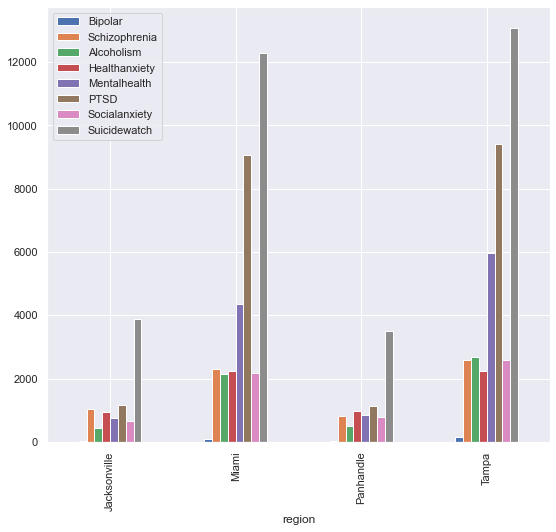

In [204]:
import matplotlib.pyplot as plt 
rmfinal.plot(x="region", y=["Bipolar","Schizophrenia","Alcoholism","Healthanxiety","Mentalhealth","PTSD","Socialanxiety","Suicidewatch"], kind="bar",figsize=(9,8))
plt.show()